# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   https://www.kaggle.com/datasets/lava18/google-play-store-apps?select=googleplaystore.csv
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [84]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas.api.types
import math
from scipy.stats import zscore

from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, davies_bouldin_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from xgboost import XGBClassifier, XGBRegressor
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [85]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [86]:
file_id = '1ZHluZx0UNSJ9GfNnk4Nc-0vW2V5TeXXW'
download_url = f'https://drive.google.com/uc?id={file_id}'

# Baca file CSV dari URL
data = pd.read_csv(download_url)

# Tampilkan DataFrame untuk memastikan telah dibaca dengan benar
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19M,10000.0,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14M,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7M,5000000.0,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25M,50000000.0,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8M,100000.0,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


In [87]:
# Informasi data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10840 non-null  float64
 4   Size            10841 non-null  object 
 5   Installs        10840 non-null  float64
 6   Type            10840 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(4), object(9)
memory usage: 1.1+ MB


Dataset ini terdiri atas beberapa kolom, yaitu:

- App : Berisi nama aplikasi di Google Play Store.
- Category : Berisi kategori aplikasi/
- Rating : Berisi skor rata-rata aplikasi berdasarkan ulasan pengguna (skala 1.0 - 5.0).
- Reviews : Berisi jumlah ulasan yang diberikan oleh pengguna.
- Size : Berisi ukuran aplikasi dalam MB atau KB
- Installs : Berisi jumlah unduhan aplikasi
- Type : Berisi jenis aplikasi, apakah gratis ("Free") atau berbayar ("Paid").
- Price : Berisi harga aplikasi dalam USD (0 jika gratis).
- Content Rating : Berisi rentang usia yang disarankan untuk aplikasi (misal: Everyone, Teen, Mature 17+).
- Genres : Berisi genre aplikasi (misal: Art & Design, Productivity, Game;Puzzle), bisa memiliki lebih dari satu genre.
- Last Updated : Berisi tanggal terakhir aplikasi diperbarui
- Current Ver : Berisi versi terbaru aplikasi yang tersedia di Google Play Store.
- Android Ver : Berisi versi minimum Android yang didukung aplikasi (misal: "4.0.3 and up").




Insight:

- Untuk melakukan clustering berdasarkan popularitas, fitur yang bisa digunakan antara lain Rating, Reviews, dan Installs.
- Setelah clustering, hasilnya bisa digunakan sebagai label untuk klasifikasi aplikasi populer atau tidak.
Beberapa kolom seperti Size, Installs, dan Android Ver perlu preprocessing agar dapat digunakan dalam analisis. 🚀

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

### 4.1. Memahami struktur data

In [88]:
# Tinjau jumlah baris dan kolom dalam dataset
print("Jumlah Baris dan Kolom:", data.shape)

Jumlah Baris dan Kolom: (10841, 13)


In [89]:
# Tinjau jenis data di setiap kolom (numerikal atau kategorikal).
print(data.dtypes)

App                object
Category           object
Rating            float64
Reviews           float64
Size               object
Installs          float64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object


In [90]:
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_cols = data.select_dtypes(include=['object', 'datetime']).columns.tolist()

print("Kolom Numerikal:", numerical_cols)
print("Kolom Kategorikal:", categorical_cols)

Kolom Numerikal: ['Rating', 'Reviews', 'Installs', 'Price']
Kolom Kategorikal: ['App', 'Category', 'Size', 'Type', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']


In [91]:
numerical_features = ['Rating', 'Reviews', 'Installs', 'Price']
categorical_features =  ['App', 'Category', 'Size', 'Type', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']

Insight:
1. Dataset ini terdiri atas 10.841 baris dan 13 kolom
2. Terdapat kesalahan tipe data pada beberapa kolom, seharusnya:
    - Jenis Data dalam Dataset Numerikal (continuous/discrete)
        - Rating : Skor aplikasi berdasarkan review pengguna.
        - Reviews : Jumlah ulasan pengguna.
        - Installs : Jumlah total unduhan aplikasi (harus dikonversi dari string ke numerik).
        - Price : Harga aplikasi dalam USD (jika ada simbol $, perlu dibersihkan).
    - Kategorikal (string/object)
      - App : Nama aplikasi (tidak digunakan untuk analisis numerik).
      - Category : Kategori aplikasi.
      - Size : Ukuran aplikasi
      - Type : Jenis aplikasi (Free/Paid).
      - Content Rating : Klasifikasi usia pengguna.
      - Genres : Genre aplikasi (mungkin memiliki lebih dari satu genre).
      - Last Updated : Tanggal pembaruan terakhir (format tanggal).
      - Current Ver : Versi aplikasi saat ini (format string, tidak numerik).
      - Android Ver : Versi minimum Android yang didukung.


### 4.2. Menangani Data yang Hilang

In [92]:
# Cek missing values
print("\nMissing values per fitur:")
print(data.isnull().sum())


Missing values per fitur:
App                  0
Category             0
Rating            1474
Reviews              1
Size                 0
Installs             1
Type                 1
Price                1
Content Rating       1
Genres               0
Last Updated         1
Current Ver          8
Android Ver          3
dtype: int64


In [93]:
data.describe()

,Rating,Reviews,Installs,Price
count,9367.000000,1.084000e+04,1.084000e+04,10840.000000
mean,4.193338,4.441529e+05,1.546434e+07,1.027368
std,0.537431,2.927761e+06,8.502936e+07,15.949703
min,1.000000,0.000000e+00,0.000000e+00,0.000000
25%,4.000000,3.800000e+01,1.000000e+03,0.000000
50%,4.300000,2.094000e+03,1.000000e+05,0.000000
75%,4.500000,5.477550e+04,5.000000e+06,0.000000
max,19.000000,7.815831e+07,1.000000e+09,400.000000


In [94]:
data[data['Rating'] > 5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,NaN,"1,000+",NaN,0,NaN,NaN,"February 11, 2018",NaN,4.0 and up,NaN


In [95]:
data = data[data['Rating'] <= 5]
data.describe()

,Rating,Reviews,Installs,Price
count,9366.000000,9.366000e+03,9.366000e+03,9366.000000
mean,4.191757,5.140498e+05,1.789744e+07,0.960928
std,0.515219,3.144042e+06,9.123822e+07,15.816585
min,1.000000,1.000000e+00,1.000000e+00,0.000000
25%,4.000000,1.862500e+02,1.000000e+04,0.000000
50%,4.300000,5.930500e+03,5.000000e+05,0.000000
75%,4.500000,8.153275e+04,5.000000e+06,0.000000
max,5.000000,7.815831e+07,1.000000e+09,400.000000


In [96]:
# Replace Rating yang missing value sebanyak 1474 dengan nilai mean
data.loc[:, "Rating"] = data["Rating"].fillna(data["Rating"].mean())

In [97]:
# Drop data missing value dari kolom type, content rating, Current Ver, dan Android Ver
data = data.dropna(subset=['Type', 'Content Rating', 'Current Ver', 'Android Ver'])

# Cek missing value
print("\nMissing values per fitur:")
print(data.isnull().sum())


Missing values per fitur:
App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64


### 4.3. Analisis Distribusi dan Korelasi

- Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.

In [98]:
data.describe()

,Rating,Reviews,Installs,Price
count,9360.000000,9.360000e+03,9.360000e+03,9360.000000
mean,4.191838,5.143767e+05,1.790875e+07,0.961279
std,0.515263,3.145023e+06,9.126637e+07,15.821640
min,1.000000,1.000000e+00,1.000000e+00,0.000000
25%,4.000000,1.867500e+02,1.000000e+04,0.000000
50%,4.300000,5.955000e+03,5.000000e+05,0.000000
75%,4.500000,8.162750e+04,5.000000e+06,0.000000
max,5.000000,7.815831e+07,1.000000e+09,400.000000


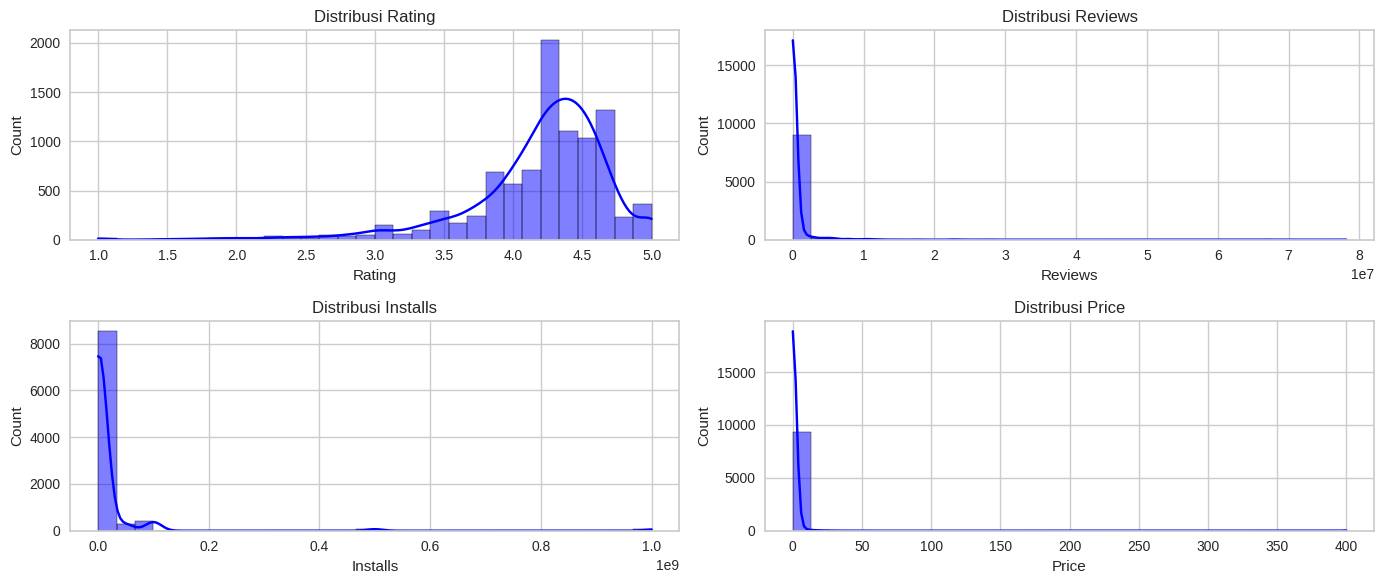

In [99]:
# Distribusi kolom numerik
numerical_features = data.select_dtypes(include=[np.number])

num_cols = len(numerical_features.columns)
rows = (num_cols // 2) + (num_cols % 4 > 0)
plt.figure(figsize=(14, rows * 3))

for i, column in enumerate(numerical_features.columns, 1):
    plt.subplot(rows, 2, i)
    sns.histplot(data[column], bins=30, kde=True, color='blue')
    plt.title(f'Distribusi {column}')
plt.tight_layout()
plt.show()

- Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

In [100]:
# Distribusi kolom kategorikal
cat_features = data.select_dtypes(include=[object])

for column in cat_features.columns:
    print(f"\nDistribusi {column}:\n")
    print(data[column].value_counts())
    print("-" * 50)



Distribusi App:

App
ROBLOX                                               9
CBS Sports App - Scores, News, Stats & Watch Live    8
Duolingo: Learn Languages Free                       7
ESPN                                                 7
8 Ball Pool                                          7
                                                    ..
Kpop Music Quiz (K-pop Game)                         1
OST)                                                 1
Preschool All-In-One                                 1
K-Chiing VPN (Free)                                  1
Magic Tiles - Blackpink Edition (K-Pop)              1
Name: count, Length: 8190, dtype: int64
--------------------------------------------------

Distribusi Category:

Category
FAMILY                 1746
GAME                   1097
TOOLS                   733
PRODUCTIVITY            351
MEDICAL                 350
COMMUNICATION           328
FINANCE                 323
SPORTS                  319
PHOTOGRAPHY             31

### 4.4. Visualisasi Data

- Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.

Text(0.5, 1.0, 'Distribusi Aplikasi Berdasarkan Kategori')

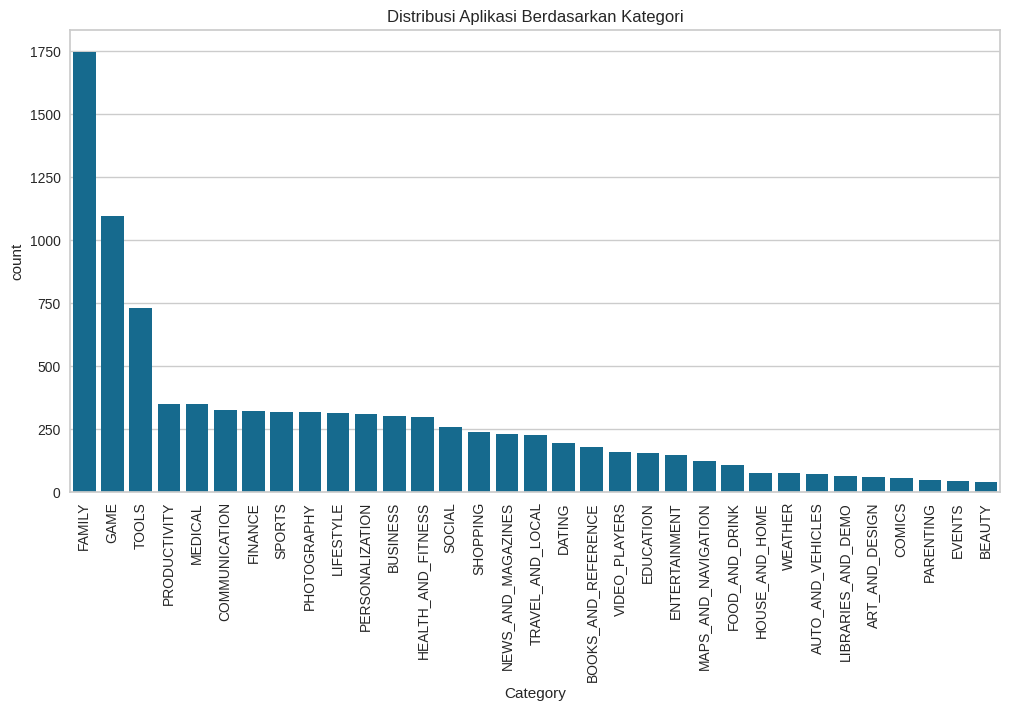

In [101]:
# Distribusi aplikasi berdasarkan kategori
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='Category', order=data['Category'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Distribusi Aplikasi Berdasarkan Kategori')

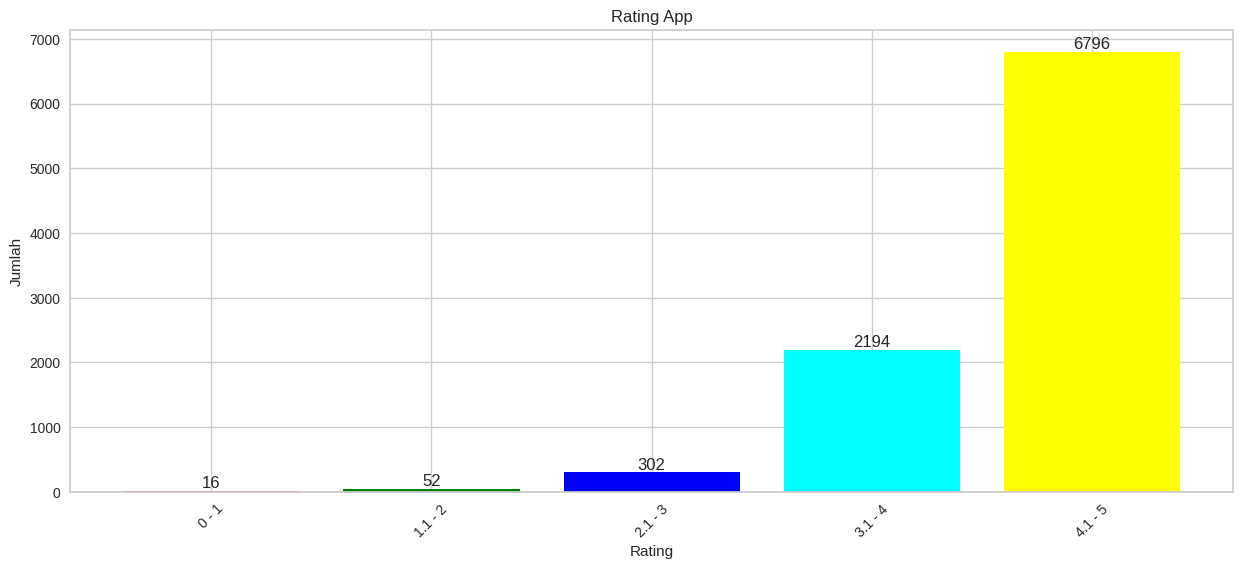

In [102]:
rating0_1 = data["Rating"][(data["Rating"] >= 0) & (data["Rating"] <= 1)]
rating11_2 = data["Rating"][(data["Rating"] >= 1.1) & (data["Rating"] <= 2)]
rating21_3 = data["Rating"][(data["Rating"] >= 2.1) & (data["Rating"] <= 3)]
rating31_4 = data["Rating"][(data["Rating"] >= 3.1) & (data["Rating"] <= 4)]
rating41_5 = data["Rating"][(data["Rating"] >= 4.1) & (data["Rating"] <= 5)]

aix = ["0 - 1", "1.1 - 2", "2.1 - 3", "3.1 - 4", "4.1 - 5"]
aiy = [len(rating0_1), len(rating11_2), len(rating21_3), len(rating31_4), len(rating41_5)]


plt.figure(figsize=(15, 6))
plt.bar(aix, aiy, color=['red', 'green', 'blue', 'cyan', 'yellow'])
plt.title("Rating App")
plt.xlabel("Rating")
plt.ylabel("Jumlah")
plt.xticks(rotation=45)

for i in range(len(aix)):
  plt.text(i, aiy[i], aiy[i], ha='center', va='bottom')

plt.show()

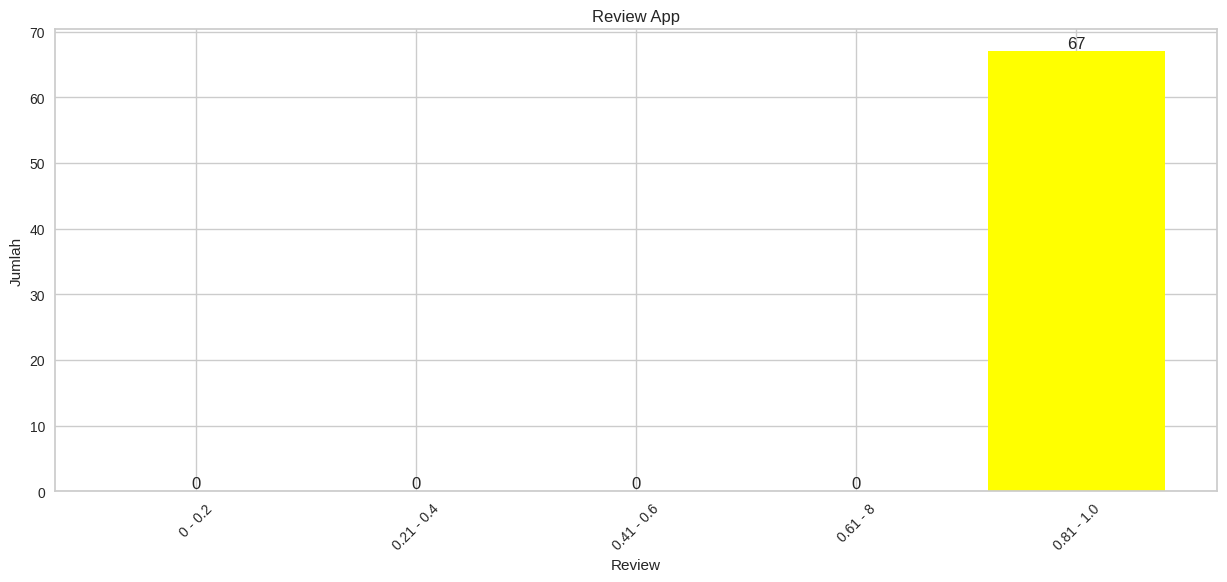

In [103]:
reviews0_02 = data["Reviews"][(data["Reviews"] >= 0) & (data["Reviews"] <= 0.2)]
reviews021_04 = data["Reviews"][(data["Reviews"] >= 0.21) & (data["Reviews"] <= 0.4)]
reviews041_06 = data["Reviews"][(data["Reviews"] >= 0.41) & (data["Reviews"] <= 0.6)]
reviews061_08 = data["Reviews"][(data["Reviews"] >= 0.61) & (data["Reviews"] <= 0.8)]
reviews081_10 = data["Reviews"][(data["Reviews"] >= 0.81) & (data["Reviews"] <= 1.0)]

aix = ["0 - 0.2", "0.21 - 0.4", "0.41 - 0.6", "0.61 - 8", "0.81 - 1.0"]
aiy = [len(reviews0_02), len(reviews021_04), len(reviews041_06), len(reviews061_08), len(reviews081_10)]


plt.figure(figsize=(15, 6))
plt.bar(aix, aiy, color=['red', 'green', 'blue', 'cyan', 'yellow'])
plt.title("Review App")
plt.xlabel("Review")
plt.ylabel("Jumlah")
plt.xticks(rotation=45)

for i in range(len(aix)):
  plt.text(i, aiy[i], aiy[i], ha='center', va='bottom')

plt.show()

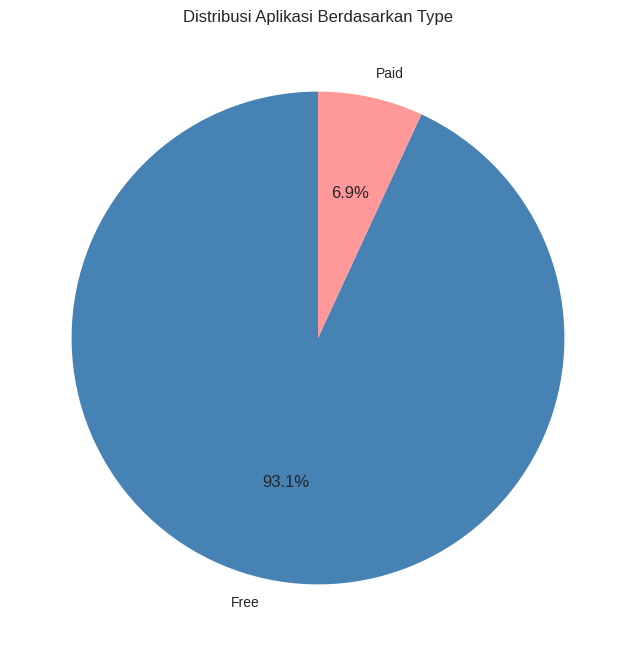

In [104]:
# Menghitung distribusi kategori aplikasi
type_counts = data["Type"].value_counts()

# Membuat pie chart
plt.figure(figsize=(8, 8))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', colors=["#4682B4", "#ff9999"], startangle=90)

# Menambahkan judul
plt.title("Distribusi Aplikasi Berdasarkan Type")

# Menampilkan pie chart
plt.show()

- Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

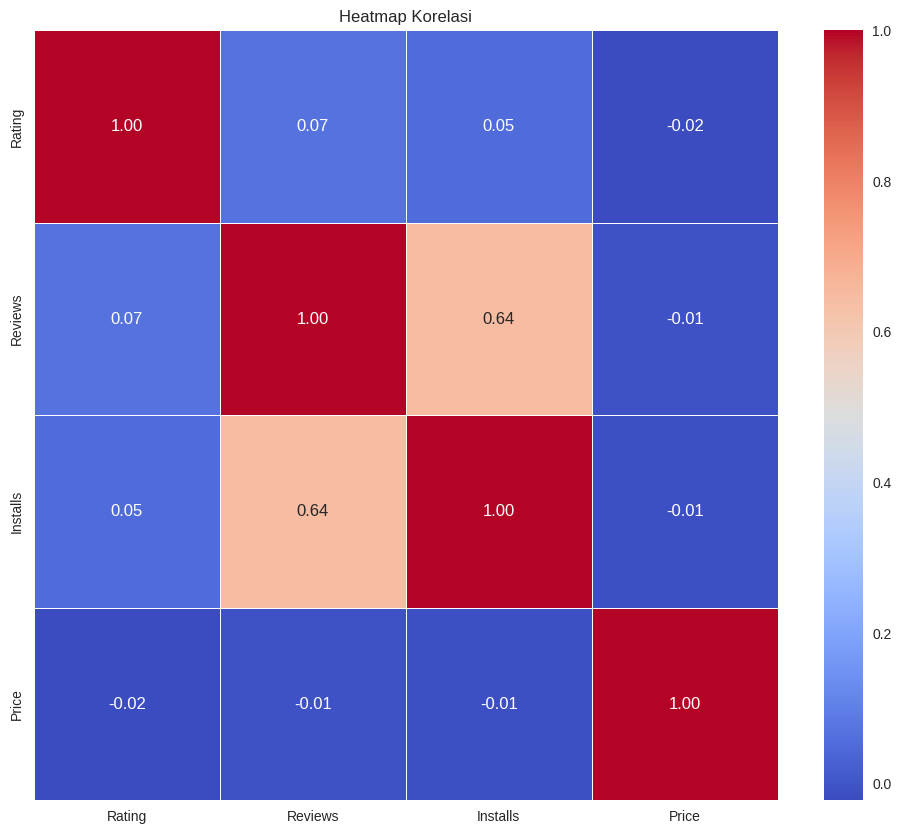

In [105]:
# Heatmap korelasi untuk fitur numerik
plt.figure(figsize=(12, 10))
correlation_matrix = numerical_features.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap Korelasi')
plt.show()

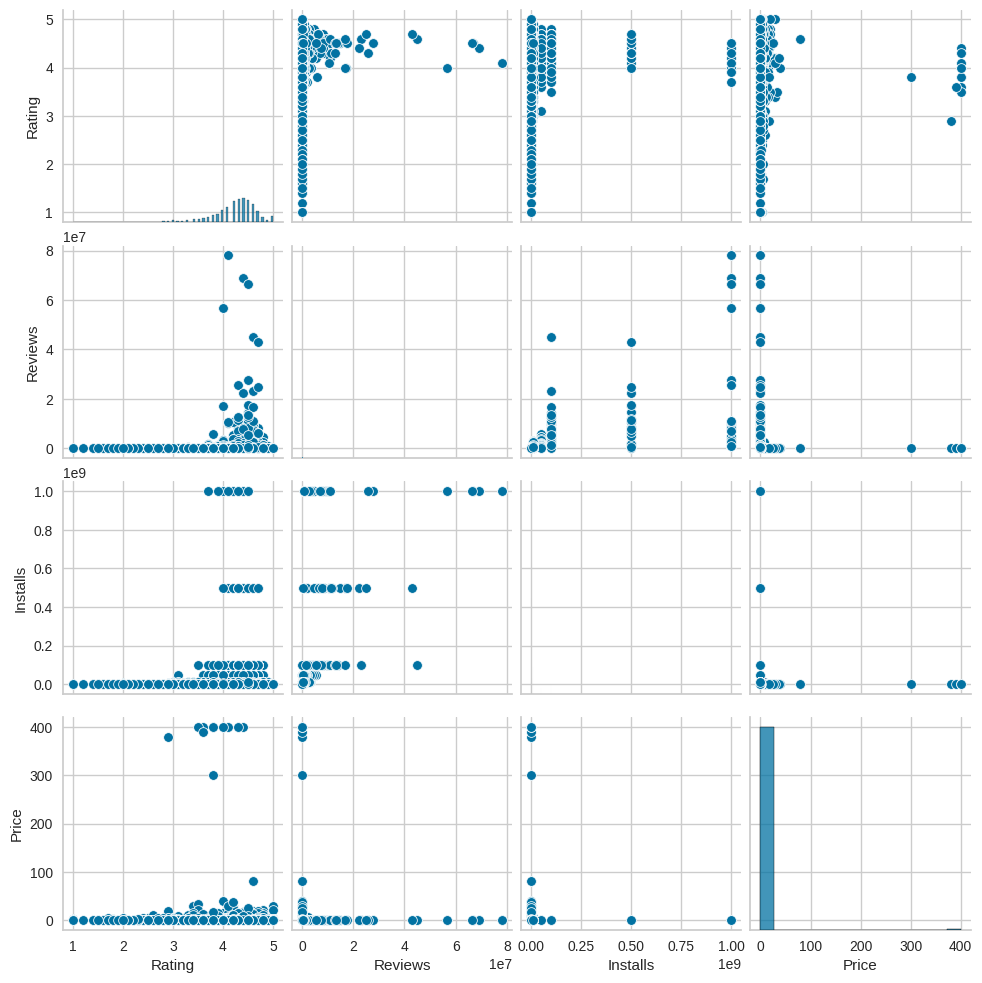

In [106]:
sns.pairplot(data)

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

### 5.1. Menghapus atau menangani data kosong (missing values)

In [107]:
data.isnull().sum()

,0
App,0
Category,0
Rating,0
Reviews,0
Size,0
Installs,0
Type,0
Price,0
Content Rating,0
Genres,0


### 5.2. Menghapus Data Duplikat

In [108]:
data.duplicated().sum()

np.int64(474)

In [109]:
data.drop_duplicates(inplace=True)
data.duplicated().sum()

np.int64(0)

In [110]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19M,10000.0,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14M,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7M,5000000.0,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25M,50000000.0,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8M,100000.0,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


### 5.3. Deteksi dan Penanganan Outlier

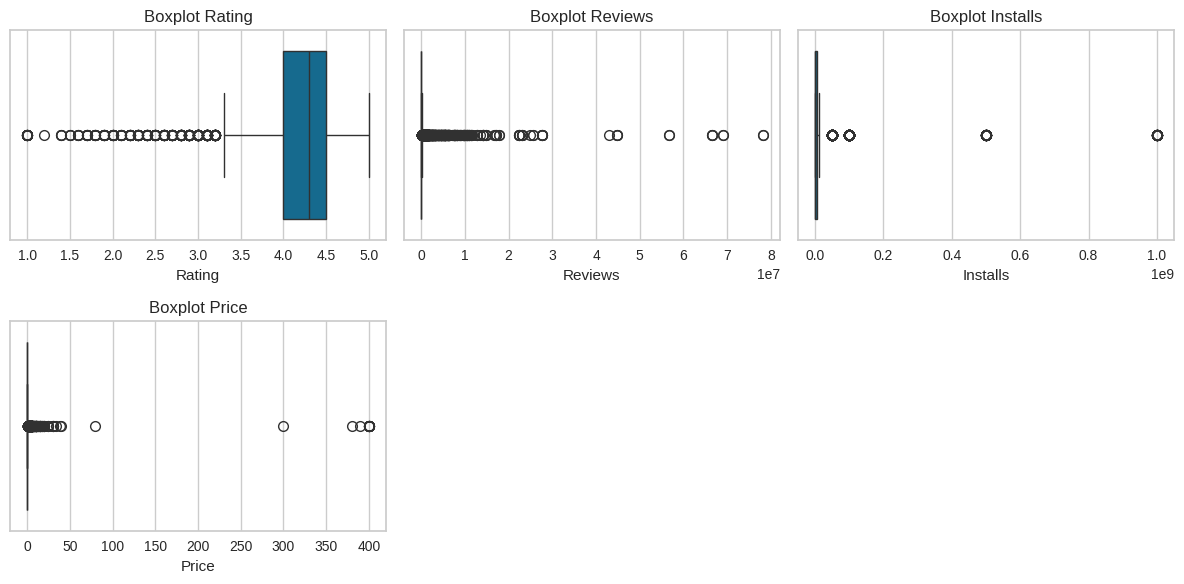

In [111]:
#check outlier with bloxplot all numerical column
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(12, 6))
for i, column in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=data[column])
    plt.title(f'Boxplot {column}')
plt.tight_layout()
plt.show()

### 5.5. Encoding Data Kategorikal

In [112]:
# Encode data kategorikal dengan menyimpan mapping
label_encoders = {}  # Dictionary untuk menyimpan encoder setiap kolom
categorical_columns = ['App', 'Category', 'Size', 'Type', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']

for column in categorical_columns:
    label_encoders[column] = LabelEncoder()  # Buat encoder untuk setiap kolom
    data[column] = label_encoders[column].fit_transform(data[column])  # Transformasi data

data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,5805,0,4.1,159.0,47,10000.0,0,0.0,1,9,1086,107,14
1,2134,0,3.9,967.0,24,500000.0,0,0.0,1,11,1094,952,14
2,7321,0,4.7,87510.0,333,5000000.0,0,0.0,1,9,1291,424,14
3,6572,0,4.5,215644.0,87,50000000.0,0,0.0,4,9,1237,2582,17
4,5860,0,4.3,967.0,56,100000.0,0,0.0,1,10,1249,250,19


### 5.6. Binning (Pengelompokkan data)

In [113]:
numerical_features = data[['Rating', 'Reviews', 'Installs', 'Price']]

scaler = StandardScaler()
scaled_features = scaler.fit_transform(numerical_features)

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai:
  Menggunakan algoritma K-Means Clustering untuk mengelompokkan aplikasi berdasarkan popularitas
2. Latih model dengan data menggunakan algoritma tersebut.

- Langkah 1: Menentukan Jumlah Cluster (K)

In [114]:
# KMeans Clustering
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_features)

# Evaluasi dengan Silhouette Score
sil_score = silhouette_score(scaled_features, cluster_labels)

print(f"Silhouette Score for {n_clusters} clusters: {sil_score:.4f}")

Silhouette Score for 3 clusters: 0.5527


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

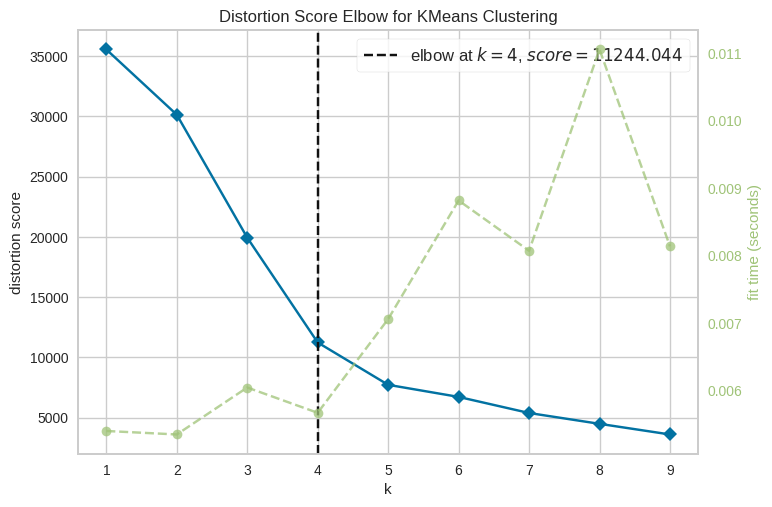

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [115]:
# Menggunakan algoritma KMEANS untuk memprediksi hubungan kolom numeric
kmeans = KMeans()

visualizer = KElbowVisualizer(kmeans, k=(1, 10))

visualizer.fit(scaled_features)

# Menampilkan grafik elbow untuk analisis
visualizer.show()

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [116]:
print("Jumlah fitur sebelum PCA:", scaled_features.shape[1])

Jumlah fitur sebelum PCA: 4


In [117]:
# Tentukan jumlah komponen utama
n_components = min(2, scaled_features.shape[1])
pca = PCA(n_components=n_components)

# Transformasi data dengan PCA
pca_data = pca.fit_transform(scaled_features)

print(f"PCA diterapkan dengan {n_components} komponen utama.")

PCA diterapkan dengan 2 komponen utama.


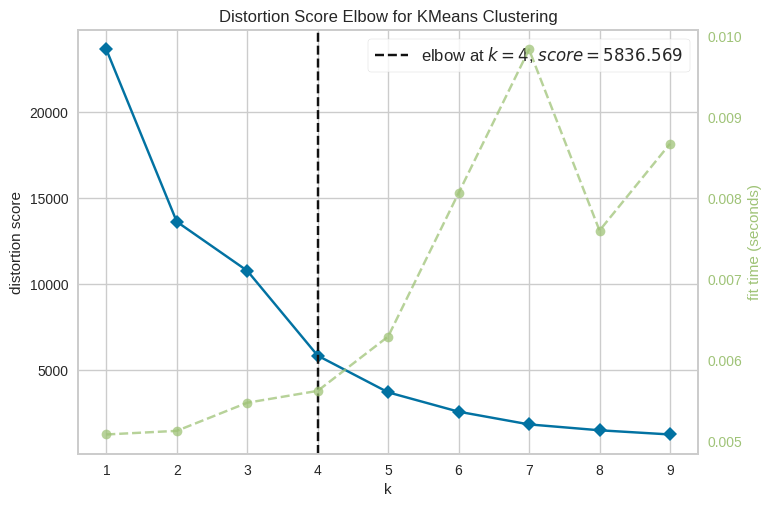

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [118]:
# Menggunakan algoritma KMEANS untuk memprediksi hubungan kolom numeric
kmeans = KMeans()

visualizer = KElbowVisualizer(kmeans, k=(1, 10))

visualizer.fit(pca_data)

# Menampilkan grafik elbow untuk analisis
visualizer.show()

In [119]:
# Apply KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(pca_data)

# Silhouette Score
sil_score = silhouette_score(pca_data, cluster_labels)
print(f"Silhouette Score untuk data yang direduksi dengan PCA: {sil_score:.4f}")

Silhouette Score untuk data yang direduksi dengan PCA: 0.9141


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

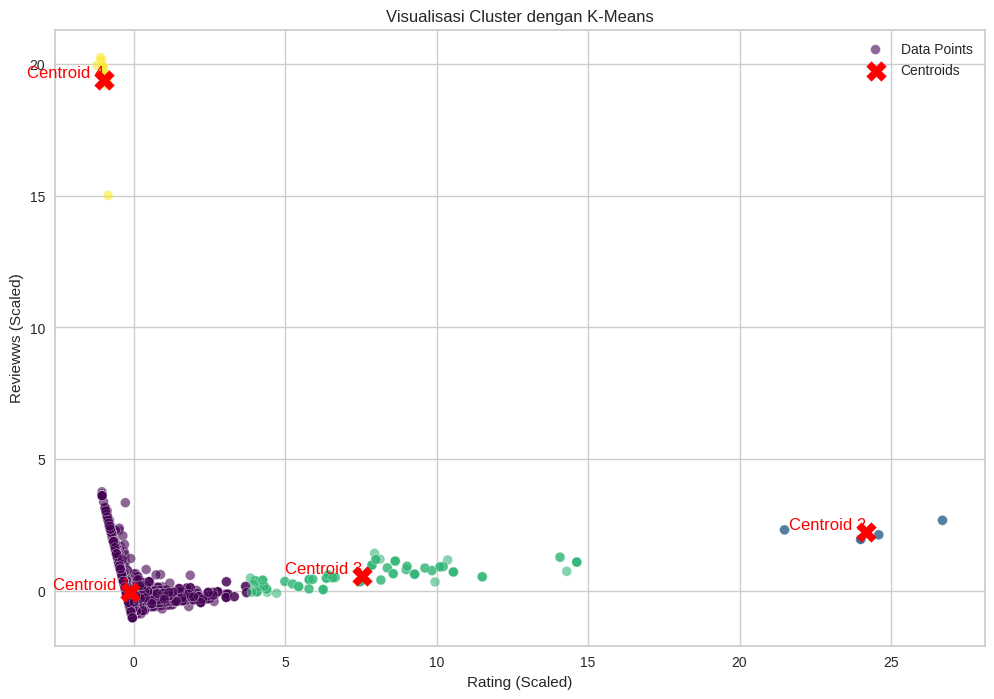

In [120]:
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(pca_data)

labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Visualisasi cluster
plt.figure(figsize=(12, 8))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=labels, cmap='viridis', s=50, alpha=0.6, edgecolors='w', marker='o', label='Data Points')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='X', label='Centroids')

for i, centroid in enumerate(centroids):
    plt.text(centroid[0], centroid[1], f'Centroid {i+1}', fontsize=12, ha='right', va='bottom', color='red')

plt.xlabel('Rating (Scaled)')
plt.ylabel('Reviewws (Scaled)')

plt.title('Visualisasi Cluster dengan K-Means')

plt.legend()

plt.show()

In [121]:
# Inisialisasi dan melatih model KMeans dengan jumlah cluster = 2
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(scaled_features)

# Mendapatkan label cluster
labels = kmeans.labels_

# Fungsi untuk analisis karakteristik cluster
def analyze_clusters(scaled_features, labels, k):
    print("Analisis Karakteristik Setiap Cluster:")
    for cluster_id in range(k):
        cluster_indices = labels == cluster_id
        cluster_data = scaled_features[cluster_indices]
        # Menghitung rata-rata untuk setiap fitur dalam cluster
        mean_reviews = cluster_data[:, 0].mean()  # Rata-rata Rating
        mean_installs = cluster_data[:, 1].mean()  # Rata-rata Reviews
        # mean_installs = cluster_data[:, 2].mean()  # Rata-rata Installs

        print(f"\nCluster {cluster_id + 1}:")
        print(f"Rata-rata Rating: {mean_reviews:.2f}")
        print(f"Rata-rata Reviews: {mean_installs:.2f}")
        # print(f"Rata-rata Installs: {mean_installs:.2f}")

# Analisis karakteristik setiap cluster
analyze_clusters(scaled_features, labels, k)

Analisis Karakteristik Setiap Cluster:

Cluster 1:
Rata-rata Rating: 0.41
Rata-rata Reviews: -0.04

Cluster 2:
Rata-rata Rating: -1.46
Rata-rata Reviews: -0.16

Cluster 3:
Rata-rata Rating: 0.26
Rata-rata Reviews: 6.00

Cluster 4:
Rata-rata Rating: -0.62
Rata-rata Reviews: -0.16


## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [122]:
data['Cluster'] = kmeans.labels_

In [123]:
# Mengembalikan data ke bentuk aslinya
for column in categorical_columns:
    data[column] = label_encoders[column].inverse_transform(data[column])  # Kembalikan ke nilai asli

data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Cluster
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19M,10000.0,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,0
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14M,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,1
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7M,5000000.0,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25M,50000000.0,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8M,100000.0,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,0


### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [124]:
data[['Rating', 'Reviews', 'Installs', 'Price']] = scaler.inverse_transform(scaled_features)

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## Cluster 1: Aplikasi dengan Rating Baik dan Jumlah Review Stabil
- **Rata-rata Rating:** 0.41  
- **Rata-rata Reviews:** -0.04  
- **Analisis:**  
  Aplikasi dalam cluster ini memiliki rating yang cukup baik dibandingkan cluster lainnya. Jumlah ulasannya relatif stabil, menunjukkan bahwa aplikasi ini memiliki basis pengguna yang cukup puas, meskipun tidak terlalu banyak mendapatkan ulasan baru.

## Cluster 2: Aplikasi dengan Rating Rendah dan Sedikit Review
- **Rata-rata Rating:** -1.46  
- **Rata-rata Reviews:** -0.16  
- **Analisis:**  
  Aplikasi dalam cluster ini memiliki rating yang sangat rendah dan jumlah review yang juga sedikit. Hal ini bisa mengindikasikan bahwa aplikasi ini kurang diminati atau mendapatkan banyak ulasan negatif dari pengguna.

## Cluster 3: Aplikasi Populer dengan Banyak Review
- **Rata-rata Rating:** 0.26  
- **Rata-rata Reviews:** 6.00  
- **Analisis:**  
  Aplikasi dalam cluster ini mendapatkan banyak ulasan dari pengguna, menunjukkan bahwa aplikasi ini cukup populer dan memiliki banyak interaksi. Namun, ratingnya tidak setinggi Cluster 1, yang bisa berarti ada beberapa aspek yang kurang memuaskan bagi pengguna.

## Cluster 4: Aplikasi dengan Rating Rendah dan Kurang Populer
- **Rata-rata Rating:** -0.62  
- **Rata-rata Reviews:** -0.16  
- **Analisis:**  
  Aplikasi dalam cluster ini memiliki rating yang di bawah rata-rata dan jumlah review yang rendah. Hal ini mengindikasikan bahwa aplikasi ini kurang menarik bagi pengguna atau memiliki sedikit pengguna yang terlibat dalam memberikan ulasan.


# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [125]:
#ekspor data
data.to_csv('Dataset_clustering.csv', index=False)